# Regularization - (l1 and l2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam # learning rate

from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [2]:
x, y = make_moons(100, noise=0.25, random_state=2)

In [4]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

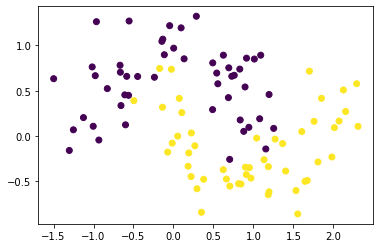

In [5]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

# Case 1 - Without Regularization

In [6]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation = 'relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [7]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy'] )

In [8]:
history = model.fit(x, y, validation_split=0.2, verbose=1, epochs=2000)

Epoch 1/2000
3/3 [==============================] - 5s 408ms/step - loss: 0.6154 - accuracy: 0.6875 - val_loss: 0.3474 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4212 - accuracy: 0.8250 - val_loss: 0.2249 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.3862 - accuracy: 0.8375 - val_loss: 0.2731 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.3893 - accuracy: 0.8375 - val_loss: 0.2282 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 28ms/step - loss: 0.3567 - accuracy: 0.8500 - val_loss: 0.2329 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.3498 - accuracy: 0.8500 - val_loss: 0.2436 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.3520 - accuracy: 0.8500 - val_loss: 0.2188 - val_accuracy: 0.9000
Epoch 8/2000

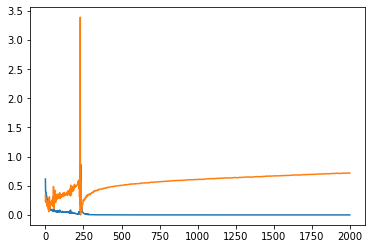

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

3888/3888 [==============================] - 6s 1ms/step


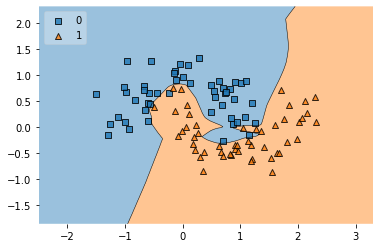

In [12]:
plot_decision_regions(x, y.astype('int'), clf=model, legend=2)
#plt.xlim(-2,3)
#plt.ylim(-1.5,2)
plt.show()

# Case 2 - with Regularization

In [13]:
model1 = Sequential()
model1.add(Dense(128, input_dim=2, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model1.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [14]:
adam = Adam(learning_rate=0.01)
model1.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy'] )

In [15]:
history1 = model1.fit(x, y, validation_split=0.2, verbose=1, epochs=2000)

Epoch 1/2000
3/3 [==============================] - 1s 188ms/step - loss: 4.1366 - accuracy: 0.7500 - val_loss: 2.7450 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 17ms/step - loss: 2.4045 - accuracy: 0.8125 - val_loss: 1.5577 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 18ms/step - loss: 1.3904 - accuracy: 0.8250 - val_loss: 0.8914 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.8724 - accuracy: 0.8125 - val_loss: 0.6150 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.6796 - accuracy: 0.8375 - val_loss: 0.5523 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.6232 - accuracy: 0.8500 - val_loss: 0.5077 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.6505 - accuracy: 0.8250 - val_loss: 0.5458 - val_accuracy: 0.9000
Epoch 8/2000

3888/3888 [==============================] - 6s 1ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


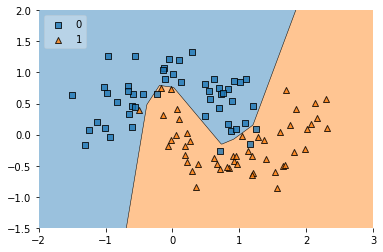

In [16]:
plot_decision_regions(x, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

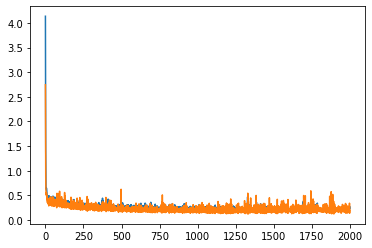

In [17]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [22]:
model1_weight_layer1 = model.get_weights()[0].reshape(256) # without regularization
model2_weight_layer1 = model1.get_weights()[0].reshape(256) # with regularization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


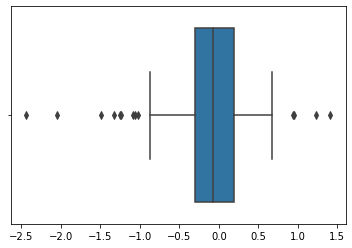

In [23]:
sns.boxplot(model1_weight_layer1) # without regularization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


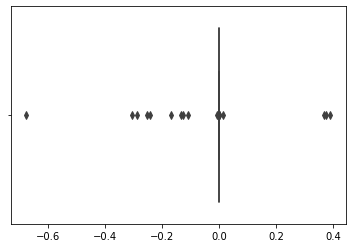

In [24]:
sns.boxplot(model2_weight_layer1) # with regularization

In [25]:
model1_weight_layer1.min()

-2.4435618

In [26]:
model1_weight_layer1.max()

1.411909

In [27]:
model2_weight_layer1.min()

-0.6788038

In [28]:
model2_weight_layer1.max()

0.38873821

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


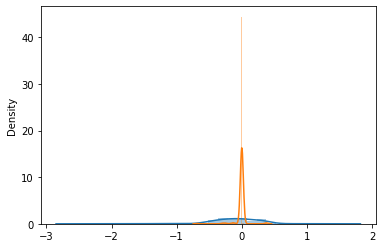

In [29]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

# Batch Normalization

In [31]:
from keras.layers import BatchNormalization

In [32]:
model2 = Sequential()
model2.add(Dense(128, input_dim=2, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate=0.01)
model2.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy'] )
history2 = model2.fit(x, y, validation_split=0.2, verbose=1, epochs=2000)

Epoch 1/2000
3/3 [==============================] - 1s 108ms/step - loss: 4.7341 - accuracy: 0.5375 - val_loss: 3.7761 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 21ms/step - loss: 3.3806 - accuracy: 0.8500 - val_loss: 3.0000 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.6606 - accuracy: 0.8500 - val_loss: 2.4396 - val_accuracy: 0.8500
Epoch 4/2000
3/3 [==============================] - 0s 20ms/step - loss: 1.9530 - accuracy: 0.9250 - val_loss: 2.0540 - val_accuracy: 0.6000
Epoch 5/2000
3/3 [==============================] - 0s 19ms/step - loss: 1.6028 - accuracy: 0.9125 - val_loss: 1.7512 - val_accuracy: 0.6000
Epoch 6/2000
3/3 [==============================] - 0s 18ms/step - loss: 1.2719 - accuracy: 0.9375 - val_loss: 1.5196 - val_accuracy: 0.6000
Epoch 7/2000
3/3 [==============================] - 0s 20ms/step - loss: 1.0423 - accuracy: 0.9125 - val_loss: 1.3573 - val_accuracy: 0.6000
Epoch 8/2000